# Assignment 1: Intro to Classifiers for CIFAR-10: 75 points (+ 5 extra credit)

### IMPORTANT: 
#### You MUST read everything in tnis notebook CAREFULLY, including ALL code comments.  If you do not, then you may easily make mistakes.

During this course we will build several classifiers for this dataset, as well as practice several skills.  We will be working on this dataset throughout the semester, putting new ideas into practice as they arise in each chapter.

Here is where you can find a large list of classifiers available to you in scikit-learn:

https://scikit-learn.org/stable/search.html?q=classifier 

You can learn more about the CIFAR-10 dataset here: https://www.cs.toronto.edu/~kriz/cifar.html 
But do not download it from that location.  There is an easier way for you to get it.

## Preliminaries

Some of the code that you run for this dataset will take a long time, so instead of sitting at your computer wondering when it will finish, it's nice to have your computer get your attention when it's ready for you.  To this end, let's install a useful package called 'beepy'.  Since it does not come installed with Anaconda, you'll have to install it manually.  Here's how to do that:
1.  Go to the Anaconda-Navigator application, which should be running on your computer already.
2.  Click on 'Environments' in the left vertical pane.
3.  Select your 'base (root)' environment, if it's not already selected.  
    You don't have to be in base, but it will be easier.  However, if you prefer, you can create a new environment called 'IT556'.
4.  Click the green/white icon that looks like a 'play' button and select 'Open Terminal'.
5.  In the terminal window, install the beepy package using this command: pip3 install beepy

This may take a while to run, but when it does you'll have beepy installed in your base environment, ready to be activated by an import. 

Now go back to Anaconda Navigator's Environments tab and make sure you are still in the same environment.
1. Select the 'Not Installed' option of the dropdown near the top of your screen.  
2. Search for scikit-learn.
3. When you find it, check the box to the left of its name.
4. Click 'Apply', which you should now see near the bottom right of your screen (or perhaps elsewhere).

#### Some of the other Python packages you need may have to be manually INSTALLED by you in one of these ways (either pip install as for beepy or by using the GUI method as with scikit-learn) before you can import them without an error message.  

In [2]:
# Task 1: 10 points.  Set up environment

# Here we import several Python packages that you will need for this assignment.
# If you get an error message when trying to perform any of these imports, you'll
# need to first INSTALL the missing package in order for the import command to locate it.
# That is how you are getting these first 10 points.

# I'm giving you ALL these imports here in one convenient place.  So if you reboot
# your computer or restart Jupyter, you can simply run this cell to get all
# of the packages easily reloaded.

# But in addition, whenever a cell below refers to one of these imported items,
# I am adding the required import in a comment near the top of the cell.
# I find this practice to be useful for a variety of reasons, e.g. if you copy a cell 
# and use it in a different notebook.

# You will see that I try to format my code to make it readable.
# e.g. All statements of the form 'import x as y' are grouped together,
# and you will also find lots of white space to neatly line up code.

import keras
import sklearn
import tensorflow
import time

import beepy              as bp    # for audio alerts
import matplotlib         as mpl   # for graphing
import matplotlib.pyplot  as plt
import numpy              as np    # for fast vector and matrix operations

from keras.datasets       import cifar10  # The Keras package comes with several datasets, incl. CIFAR10
from sklearn.linear_model import SGDClassifier

np.random.seed(42) # for reproducibility
# The next line tells Jupyter to show all plots inside the notebook
%matplotlib inline 

'Done'

'Done'

In [3]:
# To see the documentation of a function, 
# you can just do something like this:

# import beepy as bp

bp.beep?

# This works because when we imported beepy we told Python we will use 'bp.' as a prefix to refer to its functions.
# As you can see, the documentation for bp.beep is pretty bad, but the point is simply to show you how to look
# up function documentation from within the Jupyter notebook. 

Signature: bp.beep(sound=1)
Docstring: <no docstring>
File:      ~/Desktop/Anaconda/anaconda3/envs/tensorflow/lib/python3.10/site-packages/beepy/make_sound.py
Type:      function

In [4]:
# Learn how to use beepy:
# Run the code in this cell. Pick your favorite sound to get your attention after a long process is finished.

# The following assumes the following import: import beepy as bp
# It also assumes that you have installed beepy as described above.

print("Here is 'coin'")
bp.beep(sound='coin')         # 'coin' is associated with the integer '1', so you can also do this: bp.beep(1). 
                              # The other sounds are numbered 2 - 7.
print("Here is 'robot error'")
bp.beep(sound='robot_error')  # 'does not compute'

print("Here is 'error'")
bp.beep(sound='error')        # Not a bad sound for an error, but is too quiet to get your attention

print("Here is 'ping'")
bp.beep(sound='ping')         # very easy to hear

print("Here is 'ready'")
bp.beep(sound='ready')        # The happiest sound of the set.

print("Here is 'success'")
bp.beep(sound='success')      # ta-ta taa taa taa taa!

print("Here is 'wilhelm'")    # Who thought of this one? It's kind of stupid.
bp.beep(sound='wilhelm')


Here is 'coin'
Here is 'robot error'
Here is 'error'
Here is 'ping'
Here is 'ready'
Here is 'success'
Here is 'wilhelm'


In [4]:
# Task 2:  10 points

# import numpy as np

# Read the following code, and near the end you'll see where to add a couple lines 
# of your own code. We are doing this for you to learn an important concept 
# about different 'shapes' of data, so make sure you read, understand 
# and study everything in this cell.

# For ML models that work with matrices or higher-order tensors as inputs, 
# you'll generally need to reshape your data. Thus, it's important to understand 
# what this means. Here is a simple example.

array_48 = np.arange(48) # Create 1-dimensional numpy array (vector) with 48 integers
print("array_48 = np.arange(48): \n", array_48) 

# Now use reshape to change that 1-dimensional array into a 2-dimensional matrix with 8 rows and 6 columns
array_8_6 = array_48.reshape(8, 6)
print('\narray_8_6 = array_48.reshape(8, 6):\n', array_8_6) 

# Notice that the numbers are still listed in order by rows. This is called 'row major' order, which is also used by C.
# Fortran actually fills arrays in column major order, meaning that the reshaped array would look like this in Fortran:
# [[0 8 16 24 32 40]
#  [1 9 17 25 33 41]
#  ...
#  [7 15 23 31 39 47]]

# Now let's reshape array_48 into 3 dimensions

array_8_3_2 = array_48.reshape(8, 3, 2) # Notice that the product of the dimensions = 48, the number of values
print('\narray_8_3_2 = array_48.reshape(8, 3, 2):\n', array_8_3_2) 
# That gives us 8 groups of 3 by 2 matrices, and you again see the numbers increasing left-to-right, then top-down
    
# Reshape original array into 4 dimensions: (4 2 2 3)
array_4_2_2_3 = array_48.reshape(4, 2, 2, 3) 
print('\narray_4_2_2_3 = array_48.reshape(4, 2, 2, 3):\n', array_4_2_2_3)

# Now take a moment to see how this last one gives 4 large groupings of 2 small groups of 2 by 3 arrays

# We can also 'reverse' the reshaping going from the higher dimensional arrays to lower dimensional arrays.
# Let's reshape the 4-dimensional array down to 3 dimensions:

array_4_6_2 = array_4_2_2_3.reshape(4, 6, 2) # Again, the product of these dimensions = 48, but with different groupings
print('\narray_4_6_2 = array_4_2_2_3.reshape(4, 6, 2):\n', array_4_6_2)

### Try your own now that goes from array_4_2_2_3 directly down to a 2-dimensional array with 4 rows and 12 columnes called array_4_12
### and then print array_4_12 just like we've been doing.

############ 5 points: Add your code below in just two lines ##############

array_4_12 = array_4_2_2_3.reshape(4,12) # put your code in front of this comment
print('\narray_4_12 = array_4_2_2_3.reshape(4,12)', array_4_12)

########################### Your code ends above ###########################

### Finally, reshape array_4_12 back into the original 1-dimensional vector with 48 integers, 
### but call it array_1d_48 and print the result in the same format as above.

#### 5 points: Add 2 lines of code below  to reshape and print #############
array_1d_48 = array_4_12.reshape(48) # put your code in front of this comment
print('\narray_1d_48 = array_4_12.reshape(48):\n', array_1d_48)

########################### Your code ends above ###########################


array_48 = np.arange(48): 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]

array_8_6 = array_48.reshape(8, 6):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]
 [36 37 38 39 40 41]
 [42 43 44 45 46 47]]

array_8_3_2 = array_48.reshape(8, 3, 2):
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]

 [[24 25]
  [26 27]
  [28 29]]

 [[30 31]
  [32 33]
  [34 35]]

 [[36 37]
  [38 39]
  [40 41]]

 [[42 43]
  [44 45]
  [46 47]]]

array_4_2_2_3 = array_48.reshape(4, 2, 2, 3):
 [[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]]


 [[[12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]]]


 [[[24 25 26]
   [27 28 29]]

  [[30 31 32]
   [33 34 35]]]


 [[[36 37 38]
   [39 40 41]]

  [[42 43 44]
   [45 46 47]]]]

array_4_6_2 = array_4_2

### We did the above exercise because reshaping is often needed in machine learning.
Color images are represented as arrays of shape: (height, width, 3).  The height (rows) and width (columns) are often (but not necessarily) the same numbers. For the CIFAR10, dataset we are using images that have shape (32, 32, 3).  That means the pictures are in the shape of a square with 32 by 32 pixels.  Each of those pixels also has 3 numbers associated with it, that's why the third dimension is '3'. Those 3 numbers represent the hue, or saturation, for each of the 3 colors red, green and blue. Hence you will see references to RGB.  Thus, in CIFAR10 it takes 32 * 32 * 3 = 3072 numbers to represent each image. These are actually quite LOW resolution images, as you will see. We are going to build several different machine learning models to try and predict the classes of previously unseen CIFAR10 images after you have trained your model, and we will look at different ways to improve our accuracy.

In [6]:
# Task 3: 10 points total

# Now let's load the CIFAR-10 dataset.

# This cell needs: 
# import tensorflow
# import keras
# from   keras.datasets import cifar10

np.random.seed(42) # Make this notebook's output stable across runs

# Keras datasets are typically loaded in a way that allows you to set
# 4 different variables all at the same time for your convenience.
# If you downloaded CIFAR-10 from elsewhere as 60,000 3 dimensional images, 
# you'd have to write more Python code to get the 4 variables set properly.

# You can see how to obtain the CIFAR-10 data on the Keras website here:
# https://keras.io/api/datasets/cifar10/ 

########################### 5 points: Add your code below ###########################
# Put your code AFTER the '=' sign on the same line.
#Adding imports per instructions from above.
import tensorflow
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

########################### Your code ends above ####################################

# X_train and X_test now hold the 50,000 training and 10,000 test images, respectively,
# and y_train and y_test have their numeric labels.

# If you looked at the CIFAR-10 site or the Keras page for CIFAR-10 
# then you already know that there are 10 categories of pictures. 
# Let's set a global variable with these 10 names.

# Find the names of the CIFAR-10 categories from the websites just mentioned,
# and set the global variable 'LABEL_NAMES' to the ALPHABETICAL list of those names.

########################### 5 points: Add your code below ###########################

## This first statement is worth 3 points:
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        

# We can use that global variable to access the category names.
# Add a print statement that uses LABEL_NAMES to show the name of category 4

## Your print statement goes on the next line and is worth the other 2 points:

print(f'The label for category 4 is {LABEL_NAMES[4]}')
########################### Your code ends above ####################################

# If that statement did not print 'deer', then your code is wrong.  Read the above instructions more carefully and try again.
# Remember that Python uses zero-based indexing, so category 4 will be the fifth item in the list.

'Done' # I sometimes like to put this string at the very end of a notebook cell so I can visually see when it's done running.

The label for category 4 is deer


'Done'

In [7]:
# Task 4: 10 points

# The 4 variables with the data are all represented as numpy arrays.  
# Let's see how the arrays are structured.  Use the '.shape' property 
# to display the shapes of each. If you do this correctly, your output 
# should look similar to this (but it's ok if your use of spaces is different 
# in your output):

# The shape of X_train is: 	 (50000, 32, 32, 3)
# The shape of y_train is: 	 (50000, 1)
# The shape of X_test is: 	 (10000, 32, 32, 3)
# The shape of y_test is: 	 (10000, 1)

# Use a for-loop with 2 loop variables during the iteration.  
# Use the function zip() to set those 2 loop variables.
# A 'print' function should appear in the body of the for-loop.

# See Géron's chapter 2 Jupyter notebook for examples how to do this using
# the zip() function, but your loop will, of course, be different from his.

# Below, arrayNames should just be a Python list with the 4 string names of the 4 variables
# that you set in the previous cell where you loaded the CIFAR10 dataset.  
# dataArrays should be a Python list that references those variables, i.e. use
# those 4 variables, not their string names.  Look again at the expected output
# a few lines above, which should help make this clear.

########################### 10 points: Add your code below ###########################
# 2 points each for the next two lines
arrayNames = ['X_train', 'y_train', 'X_test', 'y_test']
dataArrays = [X_train,    y_train,   X_test,   y_test]

# And now write your for-loop that sets 2 local variables using the zip() function
# and prints output to the screen that looks similar to what you see above: (probably 2 lines of code)
# Use one local variable called 'n' (without the quotes, of course) that will be used in your print
# statement to print each array name, and use another local variable called 'a' that will 
# be used in the print with the .shape property to print the shape of each data array.

# Again, use Géron's chapter 2 Jupyter notebook for examples that how to do something very similar 

# 6 points for the loop you will put in the next line(s):
for n, a in zip(arrayNames, dataArrays):
    print('The shape of ' + n + ' is:', '\t', a.shape)
     
########################### Your code ends above ####################################


The shape of X_train is: 	 (50000, 32, 32, 3)
The shape of y_train is: 	 (50000, 1)
The shape of X_test is: 	 (10000, 32, 32, 3)
The shape of y_test is: 	 (10000, 1)


### What's up with these data shapes?

I just told you above that the CIFAR10 digital images have shape (32, 32, 3) so what's the extra dimension in the training and test shapes?  The CIFAR10 data is split into 50000 images for training and 10000 images for testing, so the extra dimension is telling you how many images there are.  For example, there are 50000 training images, and each image is a (32, 32, 3) array.

But we immediately have to reshape those images because (usually) if we feed a machine learning model some input data that is not 1-dimensional it will break. In Week 10 we will see how to use multidimensional input for image processing using convolutional neural networks.

Sometimes you can inform the modeling software that your input data has a different shape.  For example you can do this with Keras when constructing a neural network and Keras will automatically handle the reshaping for you.  But here we will do it manually ourselves.  We will keep the first dimension (the number of images) for both training and test data, but we need to reshape the other 3 dimensions into just 1 dimension, i.e. we are going to 'flatten' the 32 by 32 by 3 arrays into a single vector of 3,072 numbers.

How do we flatten an array?  By using the 'reshape' method that you already learned above.


Low resolution picture of bird :


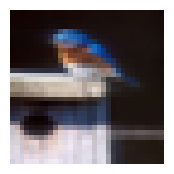


Here is the actual data that represents that picture:


array([[[ 17,   3,   2],
        [ 17,   3,   2],
        [ 17,   2,   1],
        ...,
        [ 23,  13,  11],
        [ 22,  12,  10],
        [ 19,   9,   7]],

       [[ 18,   4,   3],
        [ 18,   4,   3],
        [ 18,   4,   3],
        ...,
        [ 24,  14,  12],
        [ 23,  13,  11],
        [ 22,  12,  10]],

       [[ 18,   4,   3],
        [ 18,   4,   3],
        [ 19,   5,   4],
        ...,
        [ 24,  14,  12],
        [ 23,  13,  11],
        [ 23,  13,  11]],

       ...,

       [[217, 214, 223],
        [226, 219, 227],
        [210, 201, 213],
        ...,
        [ 33,  24,  17],
        [ 32,  23,  16],
        [ 33,  24,  17]],

       [[219, 215, 230],
        [222, 215, 229],
        [214, 208, 225],
        ...,
        [ 35,  26,  19],
        [ 34,  25,  18],
        [ 33,  24,  17]],

       [[210, 208, 223],
        [221, 216, 229],
        [215, 212, 227],
        ...,
        [ 36,  27,  20],
        [ 34,  25,  18],
        [ 32,  23,  16]]

In [7]:
# Let's view one of the pictures in this dataset
# and then we'll look at the actual data for that picture

# import matplotlib        as mpl   # for graphing
# import matplotlib.pyplot as plt

frog  = 0   # The very first image in the training data is a frog.
deer  = 3   # The fourth image in the training data is a deer.
car   = 4   # etc.
horse = 7
boat  = 8
bird  = 13  
truck = 14
dog   = 27

trainPic = bird # Change this to one of the other categories in the previous 8 lines of code to see other pictures

print('\nLow resolution picture of', LABEL_NAMES[y_train[trainPic][0]], ':')
plt.figure(figsize=(2, 2)) # You can modify these numbers to make the image larger or smaller
plt.imshow(X_train[trainPic])
plt.axis('off')
plt.show()

# That shows us an image, but not the actual data for the image.  
# So let's look at that actual data now:

print('\nHere is the actual data that represents that picture:')
X_train[trainPic]  

# From the previous code cell we know that there are 50000 training images, 
# and each image is a 3-dimensional array of numbers with shape (32, 32, 3)
# That array gives us a square grid of 32 by 32 pixels with 3 
# color channels for each pixel: red, green, blue.  
# Hence, each image is 32 * 32 * 3 = 3072 numbers.  
# That is what is being (partially) shown in the output below the picture.  
# The ellipes '...' imply additional sub-lists of numbers 
# that are not shown so we don't fill up the screen with numbers.
# The output shows that the numbers in the array are grouped in triples 
# at the lowest level of granularity.  Those are the color channel data 
# for each pixel. 

In [8]:
# Task 5: 10 points + 5 extra credit

# Preprocessing: Get the data ready for modeling

# Since we are going to use this data for modeling and predictions, 
# we need to first normalize the data (as explained by Géron) 
# so every number is between [0-1]:

X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255.0  # The largest number is 255, and the smallest 0
X_test  /= 255.0  # So this division will normalize the data.

# NOTE: The code in the next few lines is how you could standardize the data
# with mean of 0.  Standardization is discussed in our Week 2 lecture material.
# Standardization would cause issues in our assignments with some modeling functions
# that do not work with negative values, which is why we chose to do normalization
# by dividing by 255.0 above.  Standarization would also cause the picture displays
# to crash in a cell that is coming up below.

# stdScaler    = StandardScaler()
# X_train_flat = stdScaler.fit_transform(X_train_flat)
# X_test_flat  = stdScaler.fit_transform(X_test_flat)

# Let's see how the data is shaped.
print('\nX_train and y_train shapes:\t', X_train.shape, y_train.shape, 
      '\nX_test  and y_test  shapes:\t', X_test.shape,  y_test.shape)

# As explained above we need to reshape the image arrays
# to a flat vector instead of (32, 32, 3)


# Flatten the images by reshaping them, saving them into variables called
# X_train_flat and X_test_flat
# 
# The shape of X_train_flat should be (50000, 3072) and
# the shape of X_test_flat  should be (10000, 3072)

# Note: If you want to show the images again after flattening them,
# you'll have to reshape them back to their original (32, 32, 3) 

# For 5 extra credit points, figure out how to avoid 'hardcoding' that
# 2nd dimension, i.e. 3072.  If you hardcode it by using the exact number 3072,
# then your code won't work for higher resolution images with other shapes, 
# e.g. (128, 128, 3).  
# So find a way to compute the second dimension programmatically  
# so your code would work for all color images, regardless of their original shapes.  
# Hint: Use the 'shape' method to get the dimensions of the raw, unflattened images
# and use those values to compute the flat, second dimension.

# If you just can't figure out the extra credit, then just reshape by hardcoding,
# e.g. (50000, 3072) or (10000, 3072)

#################### Insert your code below, 2 lines of code for 5 points ###############
#################### and perhaps 5 more extra credit points               ###############

X_train_flat = X_train.reshape(50000, X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test_flat  = X_test.reshape(10000, X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

########################### Your code ends above ###########################

# We also have to use ravel to change the target values (the values we want to predict). 
# e.g. y_train has an original shape of (50000, 1), i.e. a 2-dimensional matrix, albeit with only one column.
# If we keep it in that shape, it will cause our modeling software to complain because 
# it wants the target values to appear as a 1-dimensional vector, which is what ravel will do for us.

y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)

#################### Insert a new print statement  below for 5 points  ###############

# Your print statement will almost be the same as mine above,
# but see the expected output a few lines below so you know what to change

print('\n X_train_flat and y_train:\t', X_train_flat.shape, y_train.shape,
     '\n X_test_flat and y_test:\t', X_test_flat.shape, y_test.shape)

########################### Your code ends above ###########################

# The output of the 2 print statements in this cell (the first print is mine,
# and the second print is yours) should look like this:

# X_train and y_train shapes:	 (50000, 32, 32, 3) (50000, 1) 
# X_test  and y_test  shapes:	 (10000, 32, 32, 3) (10000, 1)

# X_train_flat and y_train:	 (50000, 3072) (50000,) 
# X_test_flat  and y_test:	 (10000, 3072) (10000,)

# If you see different shapes, then you did something incorrectly.  Try again.

# Notice how all the shapes are different in the second print statement.

# In the first print, y_train and y_test, were 2 dimensional arrays, but after np.ravel 
# they are called 'rank 1 arrays'.  They are not actually row or column vectors 
# and don't behave as vectors. e.g. the transpose of y_train is the same as y_train.
# But don't try to use the matrix form of y_train or y_test or you'll get errors.  
# Use the rank-1 array forms created by ravel()

# We are now ready to begin modeling!


X_train and y_train shapes:	 (50000, 32, 32, 3) (50000, 1) 
X_test  and y_test  shapes:	 (10000, 32, 32, 3) (10000, 1)

 X_train_flat and y_train:	 (50000, 3072) (50000,) 
 X_test_flat and y_test:	 (10000, 3072) (10000,)


### For our first classifier of this dataset, we will use the SGDClassifier modeling class.

'SGD' stands for 'Stochastic Gradient Descent'.  You will learn the details of SGD later in this class, but you can learn how to use
the scikit-learn modeling class here:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=classifier#sklearn.linear_model.SGDClassifier 

 By default SGDClassifier implements the 'support vector machine' algorithm which we will study later in the class.  
 Also by default, SGDClassifier uses parameter: loss='hinge'
 In the class lecture slides there is a discussion of cross-validation, and one of the slides in that section
 is titled 'Objective Function'.  The term 'loss function' also appears on that same slide,
 and that is the term that is used throughout Géron's book.
 So the SGDClassifier by default uses a loss function (objective function) called 'hinge'.
 
 Let's see how SGDClassifier with the hinge loss function does on the CIFAR10 dataset. 

In [9]:
# Task 6: 10 points:  Default SGD Classifier 

#  Let's time this to see how long it takes to train an SGDClassifier model. 
#  It will take several minutes to run, so don't get impatient. This is why we are using beepy.  
#  I have a fairly fast computer and it takes about 5 minutes.  

# Create an SGD (stochastic gradient descent) classifier, using a random_state hyperparamter  
# with a value of 42 so that we will get reproducible results.  
# Use the default values for all other hyperparameters.  Consult the scikit-learn documentation
# (URL in previous cell) or use Google if you are not sure how to call the SGDClassifier

# import time
# from sklearn.linear_model import SGDClassifier

# Below where you see 'Insert your code below' you will see 7 lines for your code. 
# The 1st line begins 'sgdDefaultModel  = '  Put YOUR code after the '=' 
# The 2nd line is code that I have written for you. 
# The 3rd line is code that you need to train the model by calling sgdDefaultModel
#    and the fit() method with X_train_flat and y_train as arguments to train your model. 
#    Note that training a model is also called fitting a model.  See an example 
#    of training (fitting) an SGDClassifier model here: https://tinyurl.com/mr2ezm27
#    Just put your code in front of the comment character on the 3rd line of code.
# The 4th, 5th and 6th lines are code that I have written for you.
# The 7th line should be a call to your favorite beepy sound in order to get 
#    your attention when the training is done. See all of the beepy sounds in the cell 
#    up above that you already executed.  Just put your code in front of the # comment character.

#################### Insert your code below   ###############

sgdDefaultModel  =                        SGDClassifier(loss="hinge", alpha=0.044, max_iter=1000, random_state=42, fit_intercept=True)   # Define the model.  6 of the 10 points
startTime        =                        time.perf_counter()                                                                            # Capture the starting time
sgdDefaultModel.fit(X_train_flat, y_train)                                                                                               # Train the model, 4 of the 10 points                     
stopTime         =                        time.perf_counter()                                                                            # Capture the ending time
print(f'\nElapsed Time Default:           {stopTime - startTime:0.0f} seconds')                                                          # Display the elapsed time (about 5 minutes on my computer)
print('Default Model Accuracy: ',         sgdDefaultModel.score(X_test_flat, y_test))                                                    # Show mean accuracy on the test data (0.3242 is what I got)
bp.beep(sound='success')                                                                                                                 # Invoke favorite beepy sound.  2 of the 10 points

########################### Your code ends above #############



Elapsed Time Default:           21 seconds
Default Model Accuracy:  0.3237


### Note on the accuracy:
Your model should have an accuracy of approximately 32%.  That is not very good, but as we will see in future assignments, we can do better.  However, notice that random guessing would give us about a 10% accuracy, so we are already doing about 3 times better than that.

In [10]:
# Task 7: 15 points:  Faster SGD Classifier 

# The SGDClassifier contains a parameter called n_jobs, which by default is set to 'None', 
# meaning it will use one CPU core during training.  
# But if you set n_jobs to 2, for example, it will use TWO cores of your CPU
# and run faster.  By setting it to -1, it will use all available cores on your computer, 
# giving part of the work to each core. The result is that it will run MUCH faster, 
# but your computer may run hot, causing the internal fan to run loudly.

# So let's retrain using the parameter: n_jobs = -1 to see how much faster it will run. 
# Use the same random state setting as you used in the previous cell.
# You should have 7 lines of code just as you did in the previous cell. 
# Some of the code will be identical to the previous cell, but some of it will be different.  
# Use 'sgdFastModel' (without the quotes, of course!) for the name of the model.

# Put your code in front of the comment character in each of the next 7 lines.

#################### Insert your code below, 7 lines of code ###############

sgdDefaultModel  =                        SGDClassifier(loss="hinge", alpha=0.044, max_iter=1000, random_state=42, fit_intercept=True,n_jobs=-1)  # Define the model                         4 points
startTime        =                        time.perf_counter()                                                                                     # Capture the starting time                1 points
sgdDefaultModel.fit(X_train_flat, y_train)                                                                                                        # Train the model                          4 points
stopTime         =                        time.perf_counter()                                                                                     # Capture the ending time                  1 points
print(f'\nElapsed Time Default:           {stopTime - startTime:0.0f} seconds')                                                                   # Display the elapsed time                 1 points
print('Default Model Accuracy: ',         sgdDefaultModel.score(X_test_flat, y_test))                                                             # Accuracy of predictions on the test data 3 points
bp.beep(sound='success')                                                                                                                          # You favorite beepy sound.                1 points

########################### Your code ends above ###########################
                


Elapsed Time Default:           3 seconds
Default Model Accuracy:  0.3237


### Note on the accuracy and time:
Your model should have the same accuracy as before, but it should have run SIGNIFICANTLY faster.  On my computer it was about 1 minute instead of 5 minutes.